In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

In [2]:
np.random.seed(sum(map(ord,'regression')))
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 绘制线性回归模型的函数

使用Seaborn中的两个主要功能可视化通过回归确定的线性关系。这些函数regplot()和lmplot()是密切相关的，并且共享了大部分的核心功能。然而，了解他们不同的方式很重要，以便您可以快速为特定工作选择正确的工具。

在最简单的调用中，两个函数绘制了两个变量x和y的散点图，然后拟合回归模型y〜x并绘制了该回归线的结果回归线和95％置信区间：

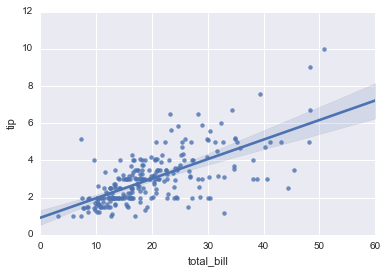

In [5]:
sns.regplot(x='total_bill',y='tip',data=tips)

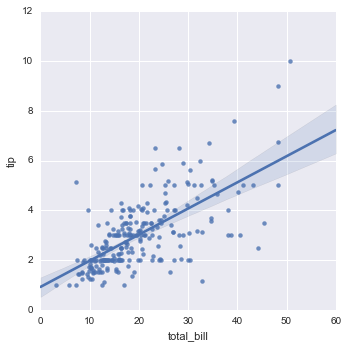

In [6]:
sns.lmplot(x="total_bill", y="tip", data=tips);

很显然，所得到的的图的结果是相同的，除了图形形状略有些不同，这里会简短的解释。

目前，要知道的另一个主要区别是regplot()以各种格式接受x和y变量，包括numpy数组、Pandas的Series列或DataFrame对象的变量引用；不一样的是，lmplot()将数据集作为一个必需的参数，而x和y变量必须指定为字符串。这种数据格式称为“长格式”或“整洁”数据。除了这种输入灵活性，regplot()可以看做是拥有lmplot()特征的子集，所以后面将使用后者进行演示。

>这里官方的例子实际上并不好，比较容易的理解方式是：上面的结果可以在regplot()函数中通过只传入x和y绘出：sns.regplot(x=tips["total_bill"], y=tips["tip"])；而相应的sns.lmplot(x=tips["total_bill"], y=tips["tip"])这种写法就会报错，因为数据集data是lmplot()的必传参数。

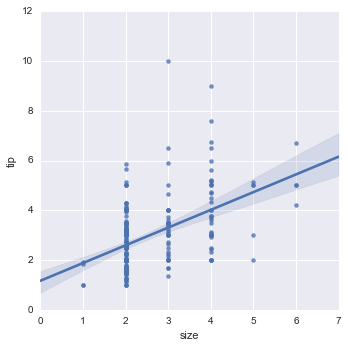

In [7]:
sns.lmplot(data=tips,x="size",y="tip")

一个常用的方法是为离散值添加一些随机噪声的“抖动”(jitter)，使得这些值的分布更加明晰。

值得注意的是，抖动仅适用于散点图数据，且不会影响拟合的回归线本身

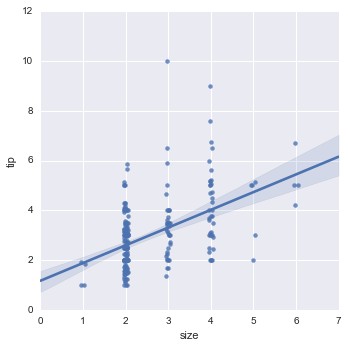

In [8]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

另一种选择是在每个独立的数据分组中对观察结果进行折叠，以绘制中心趋势的估计以及置信区间：

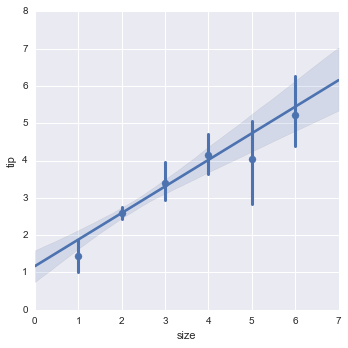

In [9]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

### 不同类型的模型拟合

In [10]:
anscombe = sns.load_dataset("anscombe")

In [12]:
anscombe.head(20)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


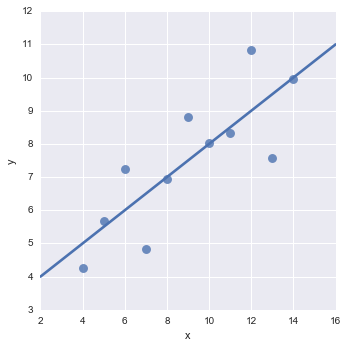

In [13]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

第二个数据集中的线性关系是一样的，但是基本清楚地表明这不是一个好的模型：

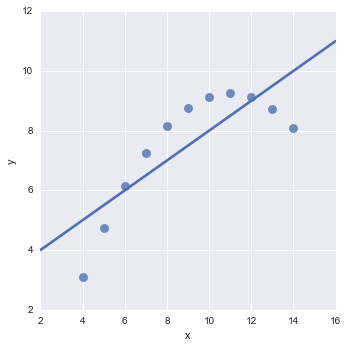

In [14]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

在存在这些高阶关系的情况下，lmplot()和regplot()可以拟合多项式回归模型来拟合数据集中的简单类型的非线性趋势：

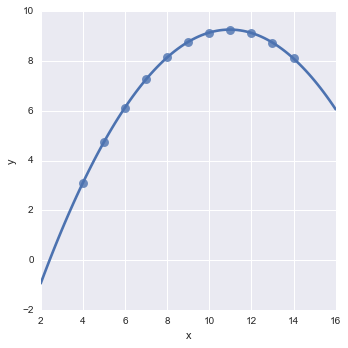

In [15]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

除了正在研究的主要关系之外，“异常值”观察还有一个不同的问题，它们由于某种原因而偏离了主要关系：

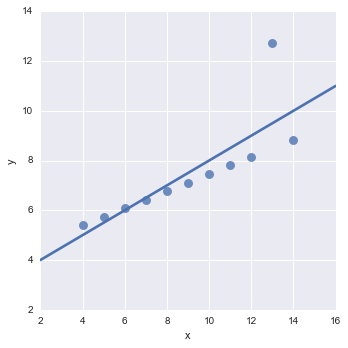

In [16]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

在有异常值的情况下，它可以使用不同的损失函数来减小相对较大的残差，拟合一个健壮的回归模型，传入robust=True：

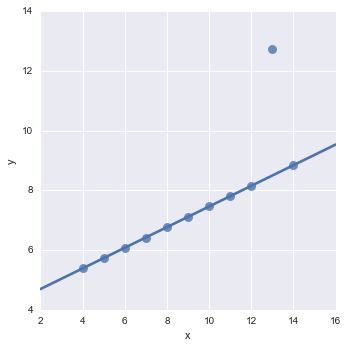

In [19]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

当y变量是二进制时，简单的线性回归也“工作”了，但提供了不可信的预测结果：

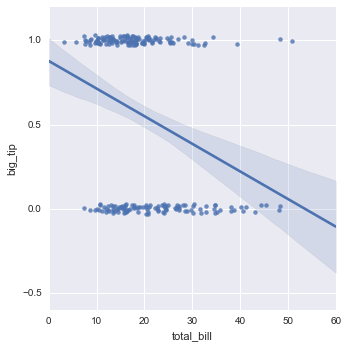

In [20]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

在这种情况下，解决方案是拟合逻辑(Logistic)回归，使得回归线显示给定值x的y=1的估计概率：

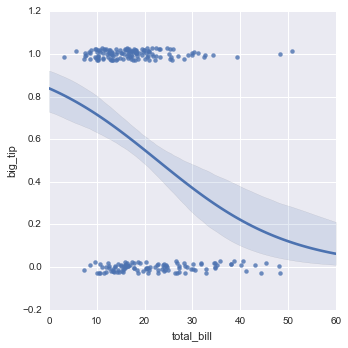

In [21]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

一个完全不同的方法是使用一个lowess smoother拟合非参数回归。 这种方法具有最少的假设，尽管它是计算密集型的，因此目前根本不计算置信区间：

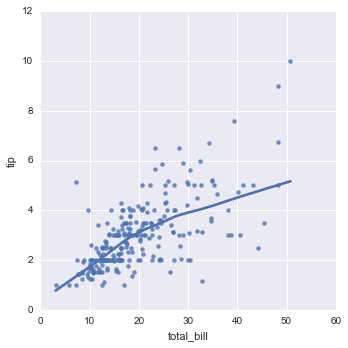

In [22]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

In [23]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,big_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False


## 调节其他变量

上面的图表显示了许多方法来探索一对变量之间的关系。然而，通常，一个更有趣的问题是“这两个变量之间的关系如何作为第三个变量的函数而变化？”这是regplot()和lmplot()之间的区别。 虽然regplot()总是显示单个关系，lmplot()将regplot()与FacetGrid结合在一起，提供了一个简单的界面，可以在“faceted”图上显示线性回归，从而允许您探索与多达三个其他类别变量的交互。

分类关系的最佳方式是绘制相同轴上的两个级别，并使用颜色来区分它们：

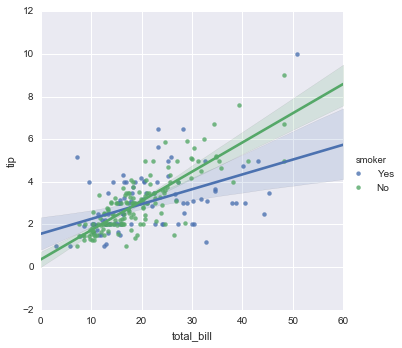

In [24]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

除了颜色之外，还可以使用不同的散点图标记来使黑色和白色的图像更好地绘制。 您还可以完全控制所用的颜色：

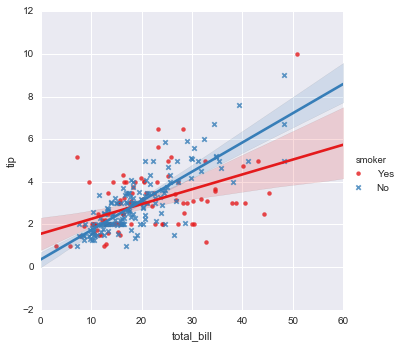

In [25]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

要添加另一个变量，您可以绘制多个“facet”，每个级别的变量出现在网格的行或列中：

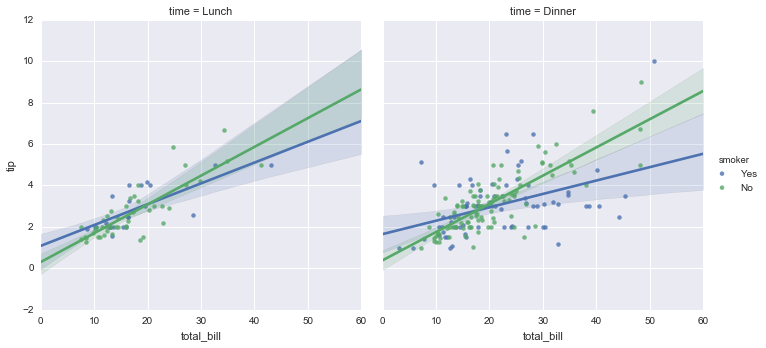

In [26]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

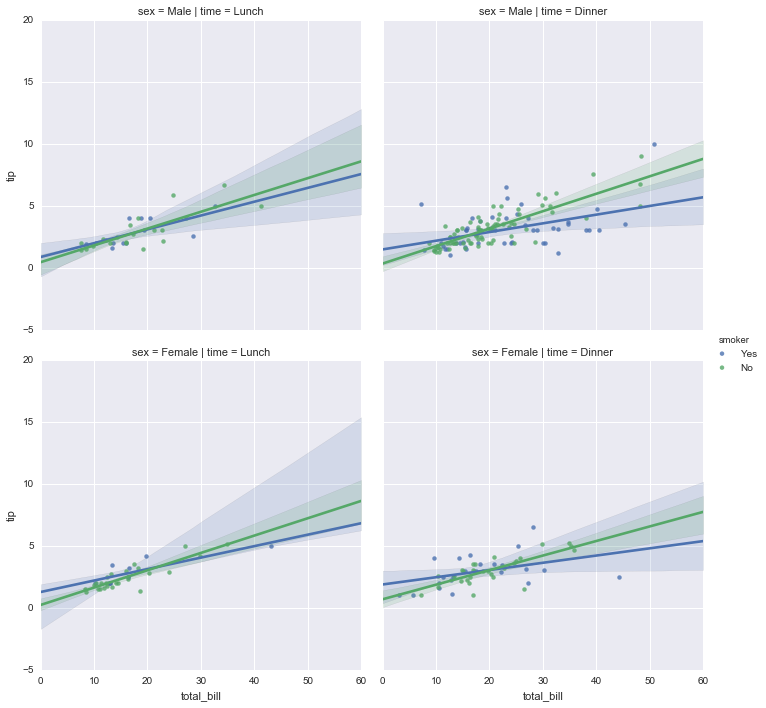

In [27]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

## 控制绘制的大小和形状

在我们注意到由regplot()和lmplot()创建的默认绘图看起来是一样的，但在轴上却具有不同大小和形状。 这是因为func：regplot是一个“轴级”功能绘制到特定的轴上。 这意味着您可以自己制作多面板图形，并精确控制回归图的位置。 如果没有提供轴，它只需使用“当前活动的”轴，这就是为什么默认绘图与大多数其他matplotlib函数具有相同的大小和形状的原因。要控制大小，您需要自己创建一个图形对象。

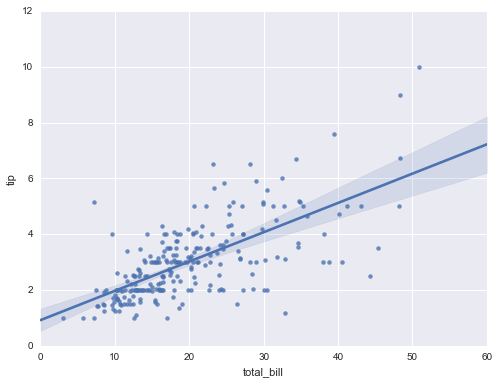

In [31]:
f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

相反，lmplot()图的大小和形状通过FacetGrid界面使用size和aspect参数进行控制，这些参数适用于每个图中的设置，而不是整体图形：

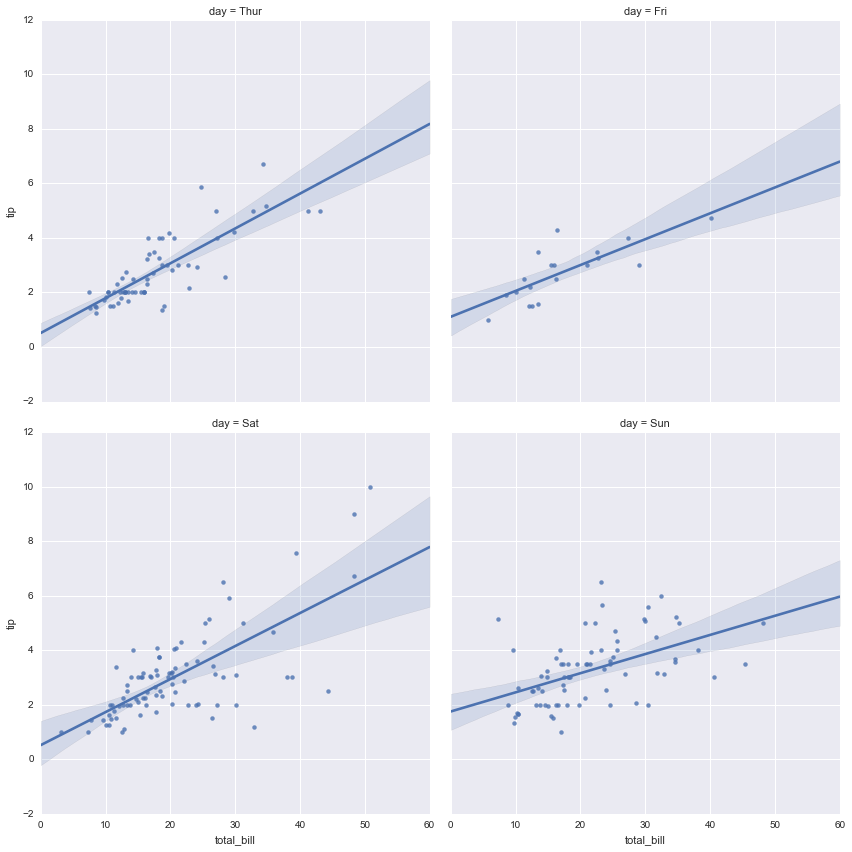

In [34]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=6);

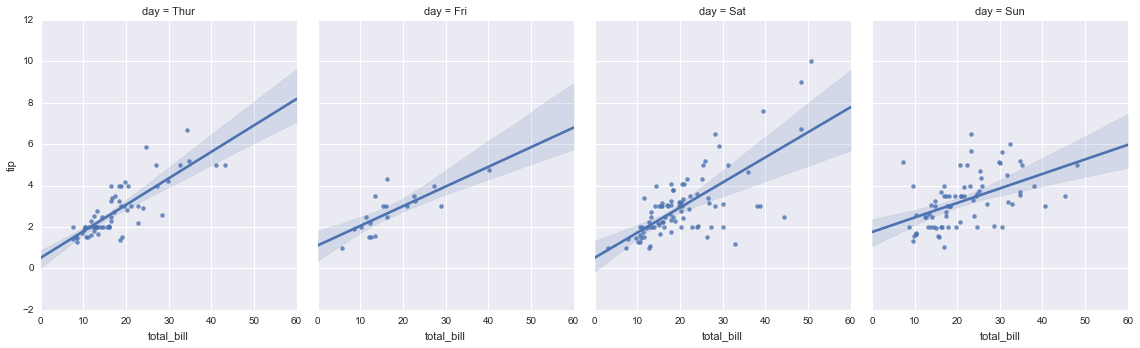

In [36]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.8);

## 在其他背景下绘制回归

另外一些Seaborn函数在更大，更复杂的绘制中使用regplot()。 第一个是在上一章分布介绍的jointplot()函数。 除了前面讨论的绘图样式之外，jointplot()可以使用regplot()通过传递kind ="reg"来显示关节轴上的线性回归拟合：

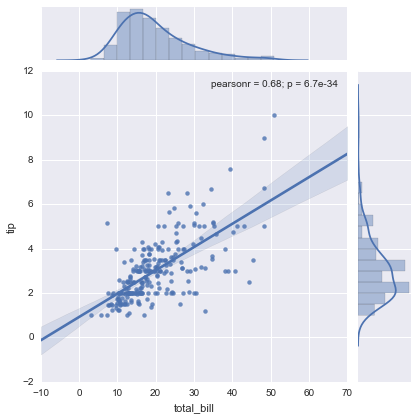

In [37]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

使用kind="reg"的pairplot()函数结合了regplot()和PairGrid来显示数据集中变量之间的线性关系。 注意这是不同于lmplot()的。 在下图中，两轴在第三个变量的两个级别上不显示相同的关系; 相反，PairGrid()用于显示数据集中变量的不同配对之间的多个关系：

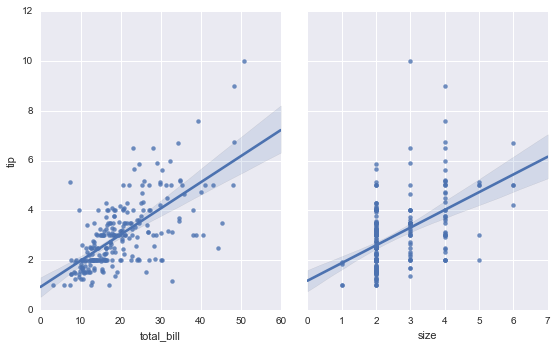

In [38]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=5, aspect=.8, kind="reg");

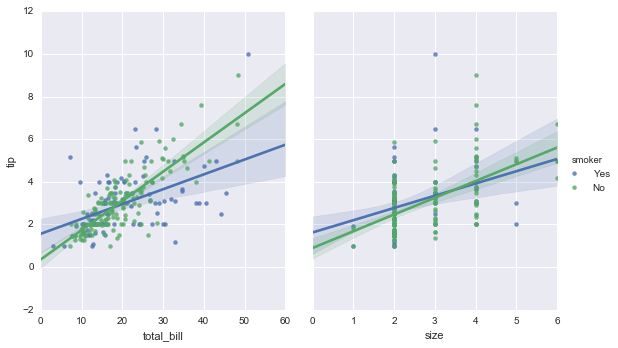

In [40]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=5, aspect=.8, kind="reg");